In [1]:
library(tidyverse)
library(skimr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.1     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘skimr’

The following object is masked from ‘package:stats’:

    filter



download the dataset from https://www.ncdc.noaa.gov/cag/global/time-series

# Data wrangling #

Normalize the column name :change the `value` to `Surface Temperature in Africa` in each dataframe

In [2]:
Africa1 <- read_csv(file = "Africa.csv")

Parsed with column specification:
cols(
  Year = col_double(),
  Value = col_double()
)


In [3]:
Africa <- Africa1 %>% rename("SurfaceTemperature" = "Value")
Africa2 <- Africa %>% rename("Surface Temperature in Africa" = "SurfaceTemperature")

In [4]:
North_America1 <- read_csv(file = "North America.csv")

Parsed with column specification:
cols(
  Year = col_double(),
  Value = col_double()
)


In [5]:
North_America <- North_America1 %>% rename("SurfaceTemperature" = "Value")
North_America2 <- North_America %>% rename("Surface Temperature in North America" = "SurfaceTemperature")

In [6]:
South_America1 <- read_csv(file = "South America.csv")

Parsed with column specification:
cols(
  Year = col_double(),
  Value = col_double()
)


In [7]:
South_America <- South_America1 %>% rename("SurfaceTemperature" = "Value")
South_America2 <- South_America %>% rename("Surface Temperature in South America" = "SurfaceTemperature")

In [8]:
Europe1 <- read_csv(file = "Europe.csv")

Parsed with column specification:
cols(
  Year = col_double(),
  Value = col_double()
)


In [9]:
Europe <- Europe1 %>% rename("SurfaceTemperature" = "Value")
Europe2 <- Europe %>% rename("Surface Temperature in Europe" = "SurfaceTemperature")

In [10]:
Asia1 <- read_csv(file = "Asia.csv")

Parsed with column specification:
cols(
  Year = col_double(),
  Value = col_double()
)


In [11]:
Asia <- Asia1 %>% rename("SurfaceTemperature" = "Value")
Asia2 <- Asia %>% rename("Surface Temperature in Asia" = "SurfaceTemperature")

In [12]:
Oceania1 <- read_csv(file = "Oceania.csv")

Parsed with column specification:
cols(
  Year = col_double(),
  Value = col_double()
)


In [13]:
Oceania <- Oceania1 %>% rename("SurfaceTemperature" = "Value")
Oceania2 <- Oceania %>% rename("Surface Temperature in Oceania" = "SurfaceTemperature")

Join together!

In [14]:
climate_df <- Africa2 %>% 
  full_join(North_America2) %>%
  full_join(South_America2) %>%
  full_join(Europe2) %>%
  full_join(Asia2) %>%
  full_join(Oceania2)

Joining, by = "Year"
Joining, by = "Year"
Joining, by = "Year"
Joining, by = "Year"
Joining, by = "Year"


check about the types of the columns, the missing values, and output a quick summary of the dataset.

In [15]:
glimpse(climate_df)

Observations: 109
Variables: 7
$ Year                                   <dbl> 1910, 1911, 1912, 1913, 1914, …
$ `Surface Temperature in Africa`        <dbl> -0.38, -0.57, -0.24, -0.11, -0…
$ `Surface Temperature in North America` <dbl> -0.13, -0.40, -0.73, -0.67, -0…
$ `Surface Temperature in South America` <dbl> -0.43, -0.57, -0.25, -0.16, -0…
$ `Surface Temperature in Europe`        <dbl> 0.01, -0.16, -0.71, -0.14, -0.…
$ `Surface Temperature in Asia`          <dbl> -0.59, -0.58, -0.88, -0.42, 0.…
$ `Surface Temperature in Oceania`       <dbl> -0.28, -0.47, -0.05, -0.60, 0.…


In [16]:
summary(climate_df) 

      Year      Surface Temperature in Africa
 Min.   :1910   Min.   :-0.6800              
 1st Qu.:1937   1st Qu.:-0.1900              
 Median :1964   Median : 0.0200              
 Mean   :1964   Mean   : 0.1681              
 3rd Qu.:1991   3rd Qu.: 0.4300              
 Max.   :2018   Max.   : 1.5200              
 Surface Temperature in North America Surface Temperature in South America
 Min.   :-1.3000                      Min.   :-0.8700                     
 1st Qu.:-0.2900                      1st Qu.:-0.1900                     
 Median : 0.1000                      Median : 0.0700                     
 Mean   : 0.1664                      Mean   : 0.1584                     
 3rd Qu.: 0.5000                      3rd Qu.: 0.4700                     
 Max.   : 1.9200                      Max.   : 1.4800                     
 Surface Temperature in Europe Surface Temperature in Asia
 Min.   :-1.0700               Min.   :-0.8800            
 1st Qu.:-0.1600               1st 

In [17]:
climate_df %>%
  skim() %>%
  kable()

Skim summary statistics  
 n obs: 109    
 n variables: 7    

Variable type: numeric

|               variable               | missing | complete |  n  | mean |  sd   |  p0   |  p25  | p50  | p75  | p100 |   hist   |
|--------------------------------------|---------|----------|-----|------|-------|-------|-------|------|------|------|----------|
|    Surface Temperature in Africa     |    0    |   109    | 109 | 0.17 | 0.49  | -0.68 | -0.19 | 0.02 | 0.43 | 1.52 | ▂▇▇▅▂▃▂▁ |
|     Surface Temperature in Asia      |    0    |   109    | 109 | 0.2  | 0.61  | -0.88 | -0.26 | 0.05 | 0.67 | 1.7  | ▂▇▇▆▂▃▃▁ |
|    Surface Temperature in Europe     |    0    |   109    | 109 | 0.19 | 0.64  | -1.07 | -0.16 | 0.06 | 0.58 | 1.87 | ▂▅▇▆▃▃▂▁ |
| Surface Temperature in North America |    0    |   109    | 109 | 0.17 | 0.61  | -1.3  | -0.29 | 0.1  | 0.5  | 1.92 | ▁▂▇▇▆▂▂▁ |
|    Surface Temperature in Oceania    |    0    |   109    | 109 | 0.14 | 0.49  | -0.89 | -0.25 | 0.11 | 0.44 | 1.33 | ▁▃▇▆▆▃▂

In [19]:
write_csv(climate_df,"Climate.csv")

# Data  analysis#

choose the data from 1950 to 2018 for ploting

In [20]:
Africa$pos = Africa$SurfaceTemperature >= 0

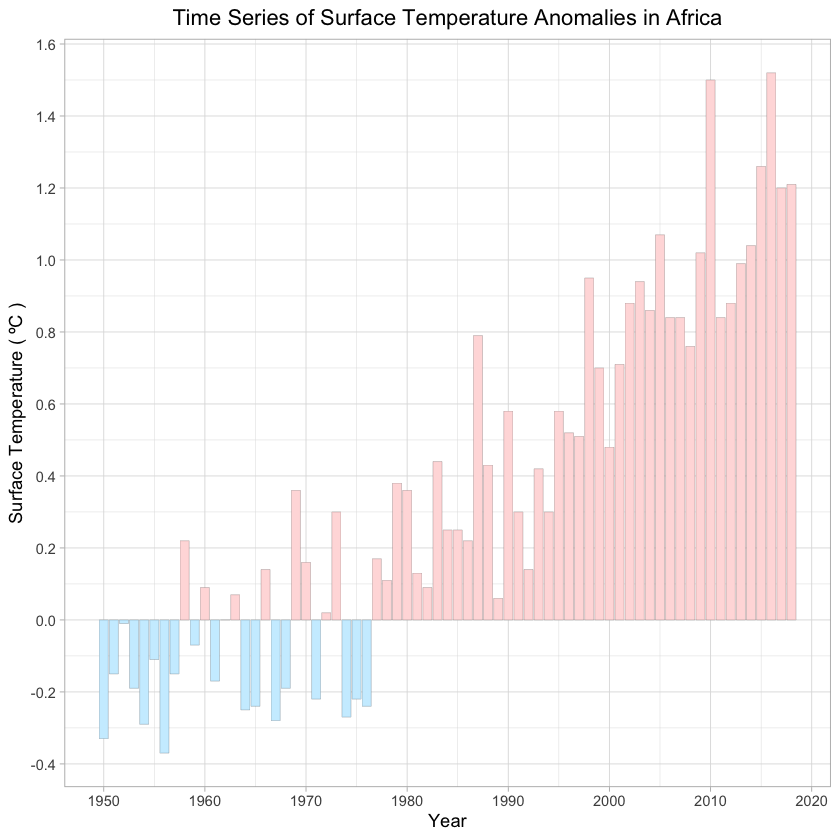

In [21]:
Africa_climate_plot <- Africa %>% 
    filter( Year >= 1950) %>%
    ggplot(aes( 
      x = Year, 
      y = SurfaceTemperature,
    fill = pos)) + 
      labs(title = "Time Series of Surface Temperature Anomalies in Africa") +
      scale_x_continuous(breaks=seq(1950, 2020, 10)) +
      scale_y_continuous(breaks=seq(-1, 1.8, 0.2)) +
      geom_bar(stat = "identity",position = "identity", colour = "black", size = 0.05) +
      xlab("Year") +  ylab ("Surface Temperature ( ºC )") +
      theme_light()+
      theme(plot.title = element_text(hjust = 0.5)) +
      scale_fill_manual(values = c("#CCEEFF", "#FFDDDD"), guide = FALSE) 
Africa_climate_plot

In [22]:
ggsave(Africa_climate_plot,filename = "Africa climate plot.jpg",width = 12,height = 9)

In [23]:
North_America$pos = North_America$SurfaceTemperature >= 0

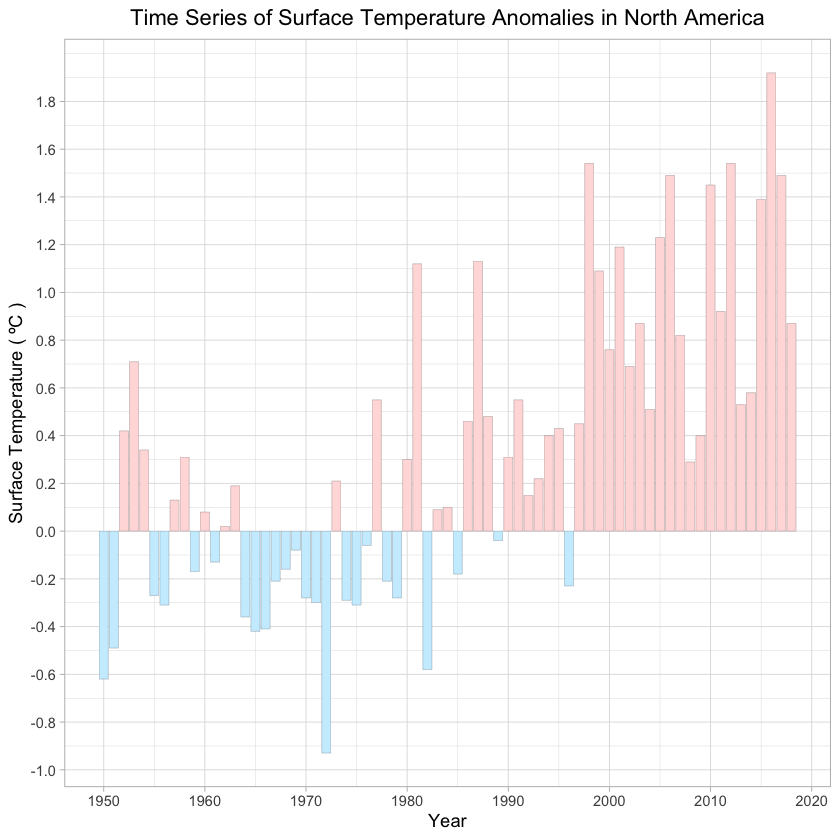

In [24]:
North_America_climate_plot <- North_America %>% 
    filter( Year >= 1950) %>%
    ggplot(aes( 
      x = Year, 
      y = SurfaceTemperature,
    fill = pos)) + 
      labs(title = "Time Series of Surface Temperature Anomalies in North America") +
      scale_x_continuous(breaks=seq(1950, 2020, 10)) +
      scale_y_continuous(breaks=seq(-1, 1.8, 0.2)) +
      geom_bar(stat = "identity",position = "identity", colour = "black", size = 0.05) +
      xlab("Year") +  ylab ("Surface Temperature ( ºC )") +
      theme_light()+
      theme(plot.title = element_text(hjust = 0.5)) +
      scale_fill_manual(values = c("#CCEEFF", "#FFDDDD"), guide = FALSE) 
North_America_climate_plot

In [25]:
ggsave(North_America_climate_plot,filename = "North America climate plot.jpg",width = 12,height = 9)

In [26]:
South_America$pos = South_America$SurfaceTemperature >= 0

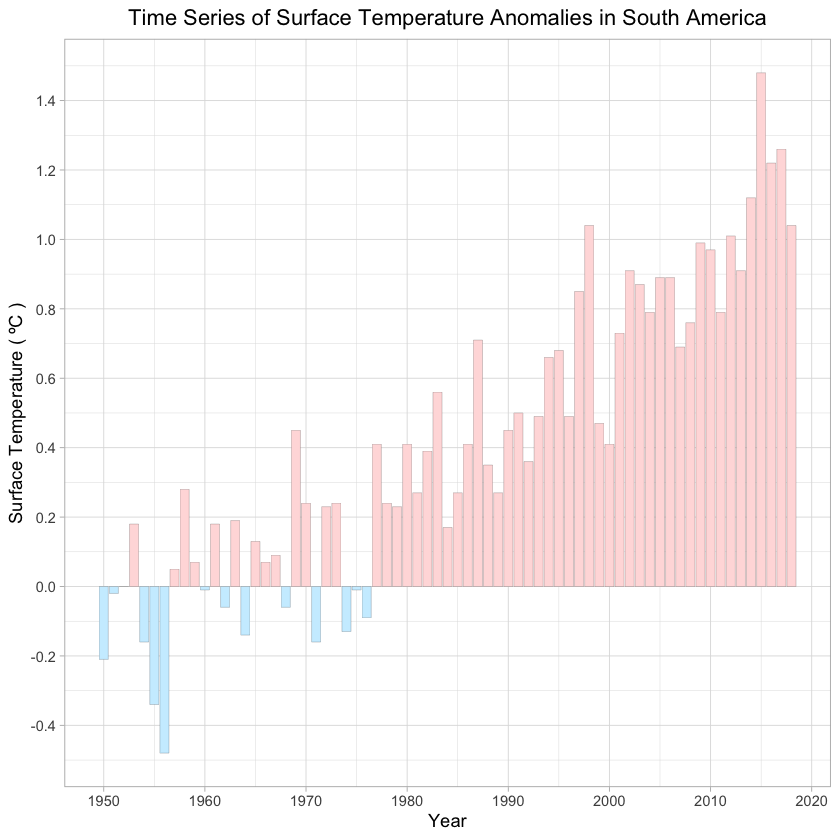

In [27]:
South_America_climate_plot <- South_America %>% 
    filter( Year >= 1950) %>%
    ggplot(aes( 
      x = Year, 
      y = SurfaceTemperature,
    fill = pos)) + 
      labs(title = "Time Series of Surface Temperature Anomalies in South America") +
      scale_x_continuous(breaks=seq(1950, 2020, 10)) +
      scale_y_continuous(breaks=seq(-1, 1.8, 0.2)) +
      geom_bar(stat = "identity",position = "identity", colour = "black", size = 0.05) +
      xlab("Year") +  ylab ("Surface Temperature ( ºC )") +
      theme_light()+
      theme(plot.title = element_text(hjust = 0.5)) +
      scale_fill_manual(values = c("#CCEEFF", "#FFDDDD"), guide = FALSE) 
South_America_climate_plot

In [28]:
ggsave(South_America_climate_plot,filename = "South America climate plot.jpg",width = 12,height = 9)

In [29]:
Europe$pos = Europe$SurfaceTemperature >= 0

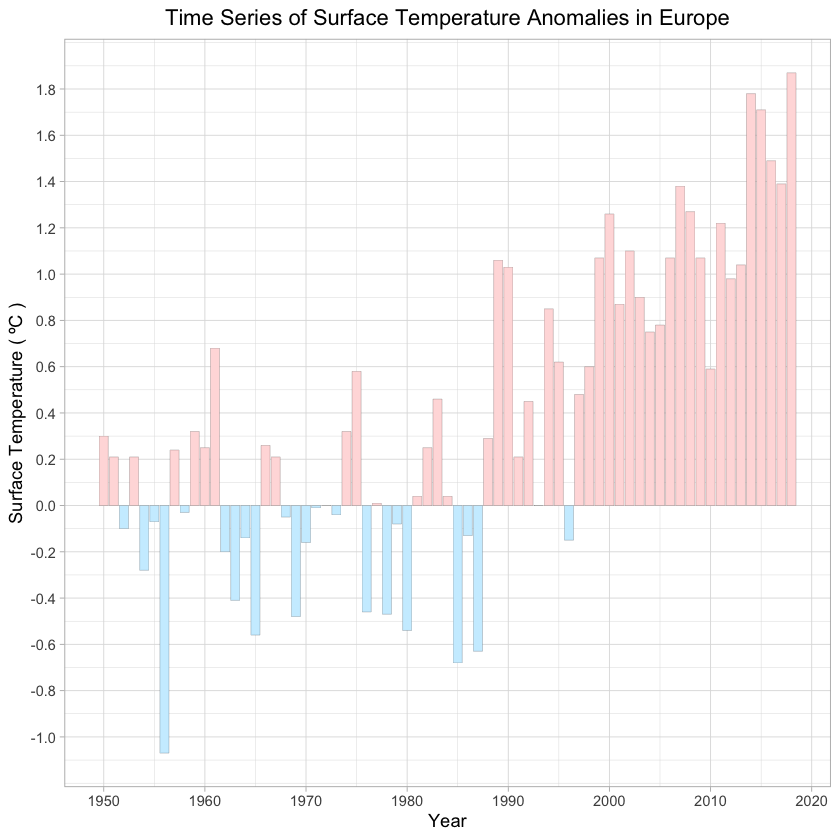

In [30]:
Europe_climate_plot <- Europe %>% 
    filter( Year >= 1950) %>%
    ggplot(aes( 
      x = Year, 
      y = SurfaceTemperature,
    fill = pos)) + 
      labs(title = "Time Series of Surface Temperature Anomalies in Europe") +
      scale_x_continuous(breaks=seq(1950, 2020, 10)) +
      scale_y_continuous(breaks=seq(-1, 1.8, 0.2)) +
      geom_bar(stat = "identity",position = "identity", colour = "black", size = 0.05) +
      xlab("Year") +  ylab ("Surface Temperature ( ºC )") +
      theme_light()+
      theme(plot.title = element_text(hjust = 0.5)) +
      scale_fill_manual(values = c("#CCEEFF", "#FFDDDD"), guide = FALSE) 
Europe_climate_plot

In [31]:
ggsave(Europe_climate_plot,filename = "Europe climate plot.jpg",width = 12,height = 9)

In [32]:
Asia$pos = Asia$SurfaceTemperature >= 0

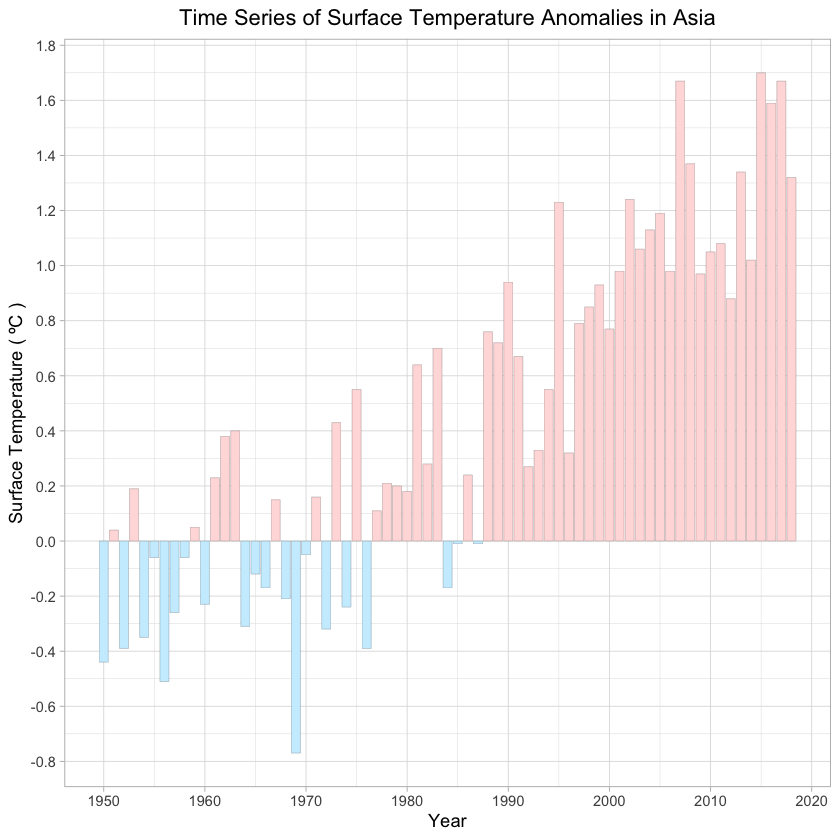

In [33]:
Asia_climate_plot <- Asia %>% 
    filter( Year >= 1950) %>%
    ggplot(aes( 
      x = Year, 
      y = SurfaceTemperature,
    fill = pos)) + 
      labs(title = "Time Series of Surface Temperature Anomalies in Asia") +
      scale_x_continuous(breaks=seq(1950, 2020, 10)) +
      scale_y_continuous(breaks=seq(-1, 1.8, 0.2)) +
      geom_bar(stat = "identity",position = "identity", colour = "black", size = 0.05) +
      xlab("Year") +  ylab ("Surface Temperature ( ºC )") +
      theme_light()+
      theme(plot.title = element_text(hjust = 0.5)) +
      scale_fill_manual(values = c("#CCEEFF", "#FFDDDD"), guide = FALSE) 
Asia_climate_plot

In [34]:
ggsave(Asia_climate_plot,filename = "Asia climate plot.jpg",width = 12,height = 9)

In [35]:
Oceania$pos = Oceania$SurfaceTemperature >= 0

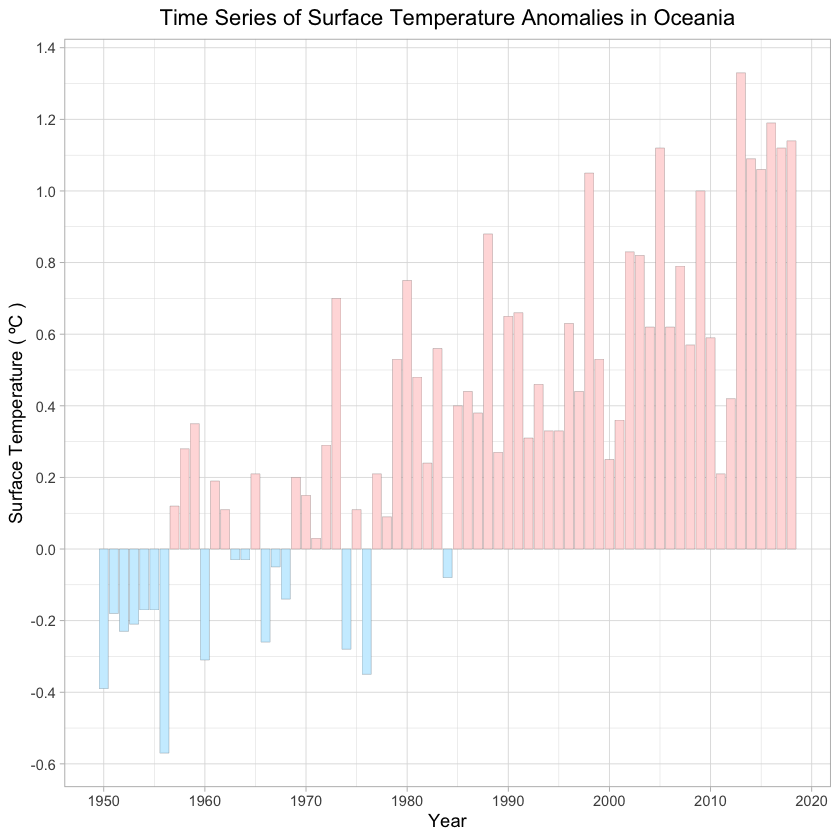

In [36]:
Oceania_climate_plot <- Oceania %>% 
    filter( Year >= 1950) %>%
    ggplot(aes( 
      x = Year, 
      y = SurfaceTemperature,
    fill = pos)) + 
      labs(title = "Time Series of Surface Temperature Anomalies in Oceania") +
      scale_x_continuous(breaks=seq(1950, 2020, 10)) +
      scale_y_continuous(breaks=seq(-1, 1.8, 0.2)) +
      geom_bar(stat = "identity",position = "identity", colour = "black", size = 0.05) +
      xlab("Year") +  ylab ("Surface Temperature ( ºC )") +
      theme_light()+
      theme(plot.title = element_text(hjust = 0.5)) +
      scale_fill_manual(values = c("#CCEEFF", "#FFDDDD"), guide = FALSE) 
Oceania_climate_plot

In [37]:
ggsave(Oceania_climate_plot,filename = "Oceania climate plot.jpg",width = 12,height = 9)

Put all plots together

In [38]:
library(ggpubr)

Loading required package: magrittr

Attaching package: ‘magrittr’

The following object is masked from ‘package:purrr’:

    set_names

The following object is masked from ‘package:tidyr’:

    extract



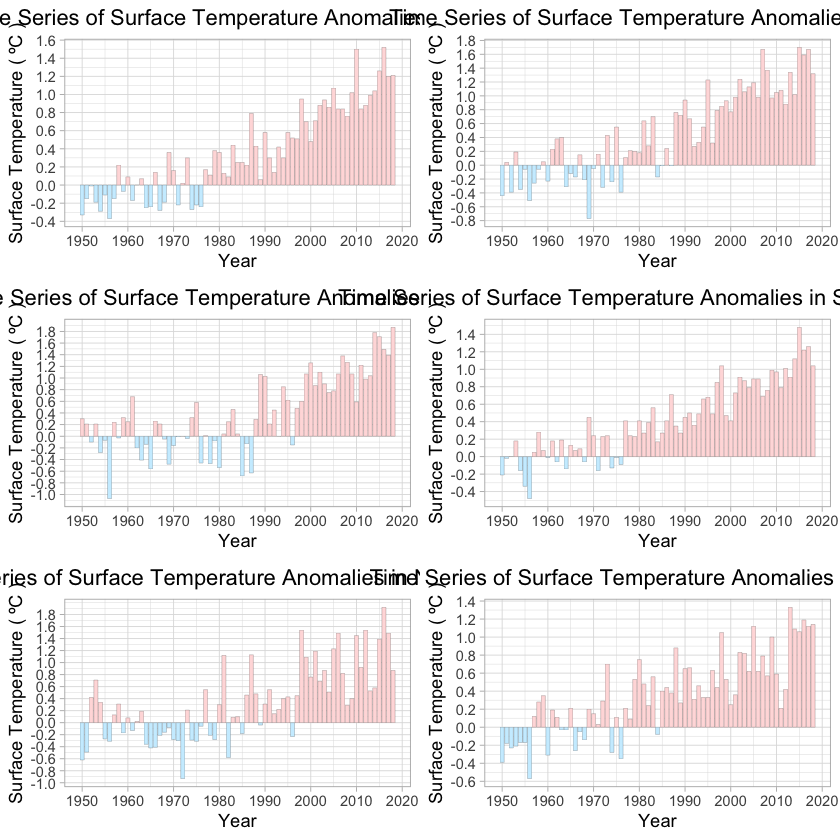

In [39]:
general_plot <- ggarrange(Africa_climate_plot, Asia_climate_plot, 
                    Europe_climate_plot, South_America_climate_plot, 
                    North_America_climate_plot, Oceania_climate_plot, ncol = 2, nrow = 3)
general_plot

In [40]:
ggsave(general_plot,filename = "Climate general plot.jpg",width = 12,height = 9)